In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Data

    map = {
        'bart_simpson': 0,
        'charles_montgomery_burns': 1,
        'homer_simpson': 2,
        'krusty_the_clown': 3,
        'lisa_simpson': 4,
        'marge_simpson': 5,
        'milhouse_van_houten': 6,
        'moe_szyslak': 7,
        'ned_flanders': 8,
        'principal_skinner': 9,
    }


In [2]:
df = pd.read_csv("train.csv")
df = df[df["label"] != "label"]
df["label"] = df["label"].astype(int)
df.head()

/tmp/ipykernel_16027/2813267450.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,41,10,8,3,4,7,0,4,0,...,112,87,38,45,41,46,53,40,49,47
1,7,130,106,83,64,61,66,64,64,64,...,67,66,65,61,61,63,64,64,64,64
2,7,37,41,38,38,40,39,40,38,39,...,50,149,151,160,161,84,104,105,100,99
3,7,46,47,40,34,19,24,24,24,24,...,42,46,48,34,27,39,49,55,37,46
4,7,15,21,14,24,24,14,15,19,8,...,32,30,27,27,27,112,78,74,70,70


# Function Definition

In [3]:
def relu(Z):
	return np.maximum(0, Z)

def relu_derivative(Z):
	return Z > 0

def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
	m = y_true.shape[0]
	log_likelihood = -np.log(y_pred[range(m), y_true])
	loss = np.sum(log_likelihood) / m
	return loss

def one_hot(Y, C):
	Y = np.eye(C)[Y.reshape(-1)]
	return Y

# Network Model

In [4]:
class SimpleCNN:
	def __init__(self, input_size, hidden_size, output_size):
		self.W1 = np.random.randn(input_size, hidden_size) * 0.01
		self.b1 = np.zeros((1, hidden_size))
		self.W2 = np.random.randn(hidden_size, hidden_size) * 0.01
		self.b2 = np.zeros((1, hidden_size))
		self.W3 = np.random.randn(hidden_size, output_size) * 0.01
		self.b3 = np.zeros((1, output_size))
	
	def forward(self, X):
		self.Z1 = np.dot(X, self.W1) + self.b1
		self.A1 = relu(self.Z1)
		self.Z2 = np.dot(self.A1, self.W2) + self.b2
		self.A2 = relu(self.Z2)
		self.Z3 = np.dot(self.A2, self.W3) + self.b3
		self.A3 = softmax(self.Z3)
		return self.A3
	
	def backward(self, X, Y, learning_rate=0.01):
		m = Y.shape[0]
		Y = one_hot(Y, self.A3.shape[1])
		
		dZ3 = self.A3 - Y
		dW3 = (1/m) * np.dot(self.A2.T, dZ3)
		db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)
		
		dA2 = np.dot(dZ3, self.W3.T)
		dZ2 = dA2 * relu_derivative(self.Z2)
		dW2 = (1/m) * np.dot(self.A1.T, dZ2)
		db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
		
		dA1 = np.dot(dZ2, self.W2.T)
		dZ1 = dA1 * relu_derivative(self.Z1)
		dW1 = (1/m) * np.dot(X.T, dZ1)
		db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
		
		# Update weights and biases
		self.W1 -= learning_rate * dW1
		self.b1 -= learning_rate * db1
		self.W2 -= learning_rate * dW2
		self.b2 -= learning_rate * db2
		self.W3 -= learning_rate * dW3
		self.b3 -= learning_rate * db3


In [5]:

# Assuming X is your input data and Y are your labels
# X = np.random.randn(number_of_samples, 784)  # Example input
X = df.drop("label", axis=1).values
# Y = np.array([0, 1, 2, ..., 9])  # Example labels (for 10 classes)
Y = np.array(df["label"].values)

# Example usage
learning_rate = 0.01
input_size = X.shape[1]
hidden_size = 100
output_size = 10
model = SimpleCNN(input_size, hidden_size, output_size)


# Forward pass
predictions = model.forward(X)

# Compute loss
loss = cross_entropy_loss(predictions, Y)

# Backward pass and update weights
model.backward(X, Y, learning_rate)

In [18]:
cost = []
epochs = 500
learning_rate = 0.001
for i in range(epochs):
	print(f"{i}, {loss}")
	predictions = model.forward(X)
	loss = cross_entropy_loss(predictions, Y)
	cost.append(loss)
	model.backward(X, Y, learning_rate)

0, 1.1298992081908728
1, 1.1980714721362165
2, 1.090922795928948
3, 1.020882689793961
4, 0.9711639583526815
5, 0.9338210395254106
6, 0.9045688533809519
7, 0.8816200771127991
8, 0.8627647180538679
9, 0.8462166479745588
10, 0.8323903692369772
11, 0.8207966488669627
12, 0.8109440705820896
13, 0.8024647247688829
14, 0.795055653924338
15, 0.7885356288908164
16, 0.782807663508398
17, 0.7778014787141396
18, 0.7732775675546011
19, 0.7692675340838814
20, 0.7656556870445611
21, 0.7623751992539726
22, 0.7592685801339476
23, 0.7562564579020529
24, 0.7533867885892253
25, 0.7505691100182998
26, 0.7477943235912916
27, 0.7450262693833442
28, 0.7423017197375041
29, 0.7395838196669869
30, 0.7367860335018943
31, 0.7340119284848201
32, 0.7311784785489228
33, 0.7283817953337548
34, 0.7255383674949187
35, 0.7227152104276392
36, 0.7199518782196048
37, 0.717263933680787
38, 0.714644789839337
39, 0.7121275310520087
40, 0.709734910949351
41, 0.7075563567595721
42, 0.7055050348784787
43, 0.703496598798144
44, 0.

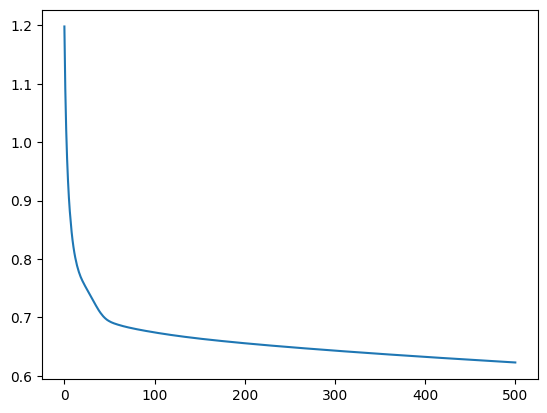

In [19]:
plt.plot( np.linspace(0, epochs, epochs), np.array(cost))

In [20]:
print(cost[0], cost[-1])

1.1980714721362165 0.6227130895177675


In [21]:
print(min(cost))

0.6227130895177675


# Testing

In [22]:
df_test = pd.read_csv("test.csv")
df_test = df[df["label"] != "label"]
df_test["label"] = df["label"].astype(int)
df_test.head()

/tmp/ipykernel_16027/3691834882.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv("test.csv")


,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,41,10,8,3,4,7,0,4,0,...,112,87,38,45,41,46,53,40,49,47
1,7,130,106,83,64,61,66,64,64,64,...,67,66,65,61,61,63,64,64,64,64
2,7,37,41,38,38,40,39,40,38,39,...,50,149,151,160,161,84,104,105,100,99
3,7,46,47,40,34,19,24,24,24,24,...,42,46,48,34,27,39,49,55,37,46
4,7,15,21,14,24,24,14,15,19,8,...,32,30,27,27,27,112,78,74,70,70


In [23]:
def predict(model, X):
	"""Make predictions with the model."""
	logits = model.forward(X)
	return softmax(logits)

def test_model(model, X_test, y_test):
	"""Test the model on the test dataset and return the accuracy."""
	predictions = predict(model, X_test)
	predicted_classes = np.argmax(predictions, axis=1)
	actual_classes = np.argmax(y_test, axis=1)
	accuracy = np.mean(predicted_classes == actual_classes)
	return accuracy

# Example usage:
# Assuming model is your trained SimpleCNN model
#X_test = np.random.randn(num_test_samples, 784)  # Example test input
X_test = df_test.drop("label", axis=1).values
#y_test = np.eye(10)[np.random.choice(10, num_test_samples)]  # Example test labels (one-hot encoded)
Y_test = np.eye(10)[np.array(df_test["label"].values)]

accuracy = test_model(model, X_test, Y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 80.38%
